# Email Spam Classifier

## 1. Module import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 2. Data

In [2]:
df = pd.read_csv('../data/tfidf_output_cleaned.csv',encoding='latin1')
#df = pd.read_csv('../data/emails.csv')
#df = pd.read_csv('../data/preprocessing.csv')
df.head()


,Label,Message,imp_feature
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [3]:
x = df.iloc[: ,-1]
y = df.iloc[: , 0]


### Split data into 2 parts to train and test

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

x_train.shape , x_test.shape , y_train.shape , y_test.shape

((4128,), (1032,), (4128,), (1032,))

## 3.Model

### Build model


In [5]:

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
x_train = tfidf.fit_transform(x_train)

LR_classifier = LogisticRegression()
LR_classifier.fit(x_train, y_train)


LogisticRegression()

### Make predict on test data

In [6]:
x_test = tfidf.transform(x_test)

y_predict_test=LR_classifier.predict(x_test)
y_predict_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

### Result

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       897
           1       0.98      0.70      0.81       135

    accuracy                           0.96      1032
   macro avg       0.97      0.85      0.90      1032
weighted avg       0.96      0.96      0.96      1032



## 4. Parameter tunning

In [8]:
# from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold


# model = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l2']
# c_values = [100, 10, 1.0, 0.1]
# # define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(x, y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

## 5. Final

In [9]:
LR_classifier = LogisticRegression(C=100, penalty='l2', solver='newton-cg')
LR_classifier.fit(x_train, y_train)
y_predict_test=LR_classifier.predict(x_test)

Precision :  1.0
Recall :  0.8666666666666667
Accuracy Score :  0.9825581395348837
F1 Score :  0.9285714285714286

 [[897   0]
 [ 18 117]]



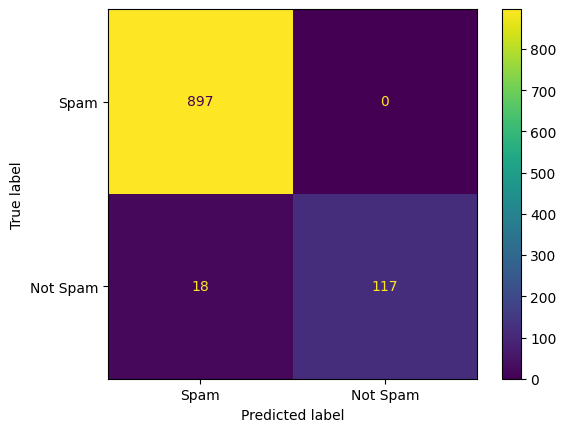

In [10]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy Score : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print("\n", confusion_matrix(y_test, y_pred))
    print("")
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=['Spam', 'Not Spam'] )
    cm_display.plot()
    plt.show()

perform(y_predict_test)